In [1]:
from keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
(x_train_data, t_train_data), (x_test_data, t_test_data) = mnist.load_data()

In [3]:
print(x_train_data.shape, t_train_data.shape)
print(x_test_data.shape, t_test_data.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
t_train_data[0]

5

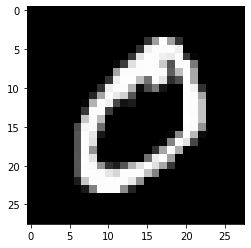

In [5]:
import matplotlib.pyplot as plt
img = x_train_data[1]
plt.imshow(img, cmap='gray')
plt.show()

In [6]:
print(x_train_data[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

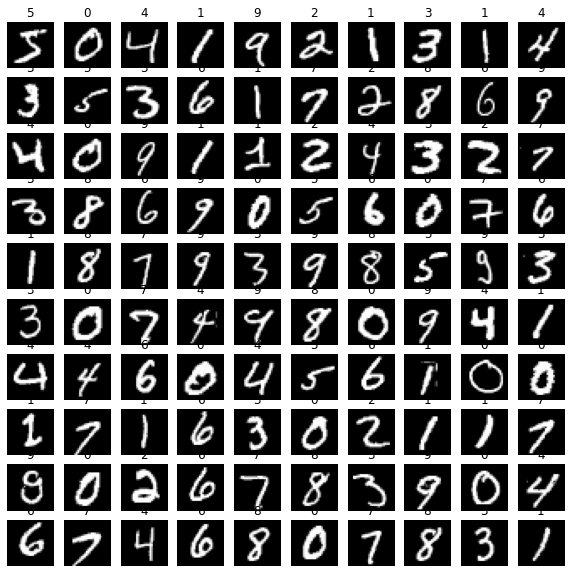

In [7]:
plt.figure(figsize=(10, 10))
for index in range(100):
    plt.subplot(10, 10, index+1)
    plt.imshow(x_train_data[index], cmap='gray')
    plt.axis('off')
    plt.title(str(t_train_data[index]))
plt.show()

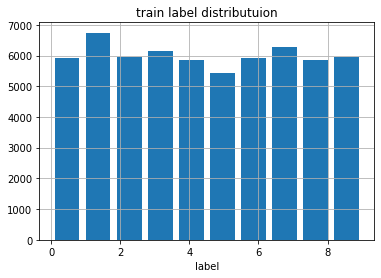

In [8]:
plt.title('train label distributuion')
plt.grid()
plt.xlabel('label')
plt.hist(t_train_data, bins=10, rwidth=0.8)
plt.show()

In [9]:
label_list=np.zeros(10)
print(label_list)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
for idx in range(len(t_train_data)):
    label = int(t_train_data[idx])
    label_list[label]+=1
print(label_list)

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]


In [11]:
x_train = (x_train_data-0.0)/(255.0-0.0)
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
x_test = (x_test_data-0.0)/(255.0-0.0)
print(x_test[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [13]:
t_train_data[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [14]:
# (OneHhot encoding)
t_train = tf.keras.utils.to_categorical(t_train_data, num_classes=10)
t_test = tf.keras.utils.to_categorical(t_test_data, num_classes=10)

In [15]:
print(t_train[0])
print(t_test[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [16]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [17]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [18]:
hist = model.fit(x_train, t_train, epochs=50, validation_split=0.3)

Epoch 1/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.7848 - accuracy: 0.8100 - val_loss: 0.3857 - val_accuracy: 0.9010
Epoch 2/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3393 - accuracy: 0.9086 - val_loss: 0.2968 - val_accuracy: 0.9204
Epoch 3/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2759 - accuracy: 0.9240 - val_loss: 0.2613 - val_accuracy: 0.9268
Epoch 4/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2413 - accuracy: 0.9331 - val_loss: 0.2380 - val_accuracy: 0.9332
Epoch 5/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2175 - accuracy: 0.9396 - val_loss: 0.2199 - val_accuracy: 0.9380
Epoch 6/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1986 - accuracy: 0.9447 - val_loss: 0.2069 - val_accuracy: 0.9423
Epoch 7/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1828 - accuracy: 0.9487 - val_loss: 0.1933 - val_accuracy:

In [19]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 849us/step - loss: 0.0888 - accuracy: 0.9746


[0.08882804214954376, 0.9746000170707703]

In [20]:
predictions=model.predict(x_test)

313/313 [==============================] - 0s 711us/step


In [21]:
print(predictions[0])
print(t_test[0])

[1.3537093e-07 1.2343225e-09 7.1534191e-06 8.0953380e-03 7.9600611e-09
 3.1208472e-08 5.0441601e-13 9.9187863e-01 4.4848280e-06 1.4204975e-05]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [22]:
label = np.argmax(predictions[0])
label

7

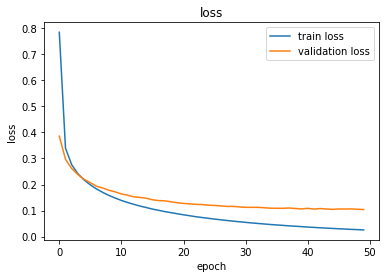

In [23]:
# 손실
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')
plt.show()

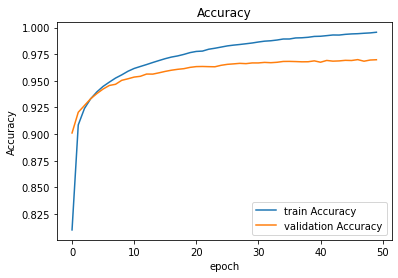

In [24]:
# 정확성
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label='train Accuracy')
plt.plot(hist.history['val_accuracy'], label='validation Accuracy')
plt.legend(loc='best')
plt.show()

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [31]:
plt.figure(figsize=(6, 6))
cm = confusion_matrix(np.argmax(t_test, axis=-1), np.argmax(predictions, axis=-1))
cm

array([[ 966,    0,    0,    3,    1,    1,    5,    1,    1,    2],
       [   0, 1123,    3,    1,    0,    1,    2,    0,    5,    0],
       [   6,    2, 1001,    2,    2,    0,    3,    7,    9,    0],
       [   2,    0,    1,  993,    2,    3,    0,    4,    3,    2],
       [   2,    0,    1,    1,  958,    0,    7,    1,    2,   10],
       [   3,    1,    0,   14,    1,  858,    7,    1,    5,    2],
       [   4,    2,    2,    1,    7,    3,  936,    0,    3,    0],
       [   0,    5,   11,    3,    1,    1,    0, 1000,    1,    6],
       [   4,    0,    4,   11,    7,    4,    1,    5,  935,    3],
       [   1,    6,    1,    6,   10,    1,    0,    6,    2,  976]],
      dtype=int64)

<Figure size 432x432 with 0 Axes>

<AxesSubplot:>

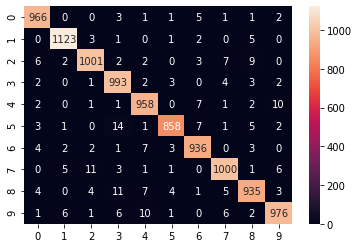

In [37]:
sns.heatmap(cm, annot=True, fmt='d')